# Import Library & Dataset

In [ ]:
# Import library
import sqlite3 as db
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

# Import library to ignore future warning 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
conn = db.connect('/content/gdrive/MyDrive/Colab Notebooks/olist.db')

In [ ]:
cur = conn.cursor()

In [ ]:
''' 
SHOW TABLES;
'''

table = cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")
table.fetchall()

[('olist_order_customer_dataset',),
 ('olist_order_dataset',),
 ('olist_order_reviews_dataset',),
 ('olist_order_payments_dataset',),
 ('olist_order_items_dataset',),
 ('olist_products_dataset',),
 ('olist_sellers_dataset',),
 ('olist_geolocation_dataset',),
 ('product_category_name_translation',)]

In [ ]:
df_customer = pd.read_sql_query (
"""
SELECT *
FROM olist_order_customer_dataset;
"""
,conn)
df_customer.set_index('index', inplace = True)
df_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
index,,,,,
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
df_order = pd.read_sql_query (
"""
SELECT *
FROM olist_order_dataset;
"""
,conn)
df_order.set_index('index', inplace = True)
df_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
index,,,,,,,,
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
df_review = pd.read_sql_query (
"""
SELECT *
FROM olist_order_reviews_dataset;
"""
,conn)
df_review.set_index('index', inplace = True)
df_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
index,,,,,,,
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
df_payment = pd.read_sql_query (
"""
SELECT *
FROM olist_order_payments_dataset;
"""
, conn)
df_payment.set_index('index', inplace = True)
df_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
index,,,,,
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
df_item = pd.read_sql_query (
"""
SELECT *
FROM olist_order_items_dataset;
"""
, conn)
df_item.set_index('index', inplace = True)
df_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
index,,,,,,,
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
df_product = pd.read_sql_query (
"""
SELECT *
FROM olist_products_dataset;
"""
, conn)
df_product.set_index('index', inplace = True)
df_product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
index,,,,,,,,,
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
df_seller = pd.read_sql_query (
"""
SELECT *
FROM olist_sellers_dataset;
"""
, conn)
df_seller.set_index('index', inplace = True)
df_seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
index,,,,
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
df_geolocation = pd.read_sql_query (
"""
SELECT *
FROM olist_geolocation_dataset;
"""
, conn)
df_geolocation.set_index('index', inplace = True)
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
index,,,,,
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
df_translate = pd.read_sql_query (
"""
SELECT *
FROM product_category_name_translation;
"""
, conn)
df_translate.set_index('index', inplace = True)
df_translate.head()

,product_category_name,product_category_name_english
index,,
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


## Merge Data

In [ ]:
df_olist = pd.merge(df_order, df_item, on='order_id', how='left')
df_olist = pd.merge(df_olist, df_product, on='product_id', how='inner')
df_olist = pd.merge(df_olist, df_payment, on='order_id', how = 'left')
df_olist = pd.merge(df_olist, df_review, on='order_id', how='left')
df_olist = pd.merge(df_olist, df_customer, on='customer_id', how='right')
df_olist = pd.merge(df_olist, df_translate, on='product_category_name', how='inner')

## Dataset Overview

In [ ]:
# Show all columns 
pd.set_option('display.max_columns', len(df_olist.columns)) 
pd.set_option('display.max_rows', 110) 
df_olist.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,None,None,2017-05-26 00:00:00,2017-05-30 22:34:40,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,office_furniture
1,b2059ed67ce144a36e2aa97d2c9e9ad2,4e7b3e00288586ebd08712fdd0374a03,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,None,None,2018-06-15 00:00:00,2018-06-15 12:10:59,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,office_furniture
2,951670f92359f4fe4a63112aa7306eba,b2b6027bc5c5109e529d4dc6358b12c3,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,None,None,2018-03-29 00:00:00,2018-04-02 18:36:47,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,office_furniture
3,997fd4b37386d10b57d4ac8cdec011a6,4c06b42fbf7b97ab10779cda5549cd1c,delivered,2018-07-08 09:59:19,2018-07-08 10:30:15,2018-07-25 15:12:00,2018-08-08 19:42:53,2018-08-16 00:00:00,1.0,8ed094bfe076c568f6bb10feada3f75d,7c67e1448b00f6e969d365cea6b010ab,2018-07-26 10:30:15,199.98,115.77,moveis_escritorio,43.0,1128.0,1.0,16133.0,63.0,59.0,25.0,1.0,credit_card,6.0,315.75,2518803238cabbf63564593e4a8fc52d,1.0,Nada de produto,"Ainda não recebi o produto. Sendo assim, não p...",2018-08-09 00:00:00,2018-08-14 11:40:54,07d190f123147d9e89d4b922543d7948,65075,sao luis,MA,office_furniture
4,b63fff1ef8b6201df68bb611ee41129e,8276de07ef25225d412b8462d73f8664,delivered,2017-04-02 22:15:27,2017-04-04 05:55:19,2017-04-13 16:28:06,2017-05-02 13:53:25,2017-05-08 00:00:00,1.0,aba86c093ccdbac75b09111d57e50004,7c67e1448b00f6e969d365cea6b010ab,2017-04-17 05:55:19,129.60,16.61,moveis_escritorio,41.0,154.0,1.0,2600.0,40.0,45.0,39.0,1.0,boleto,1.0,146.21,84467f1766775ba4c14fc25b3ca67905,4.0,None,"A crítica é à entrega, pois por se tratar dos ...",2017-05-03 00:00:00,2017-05-03 21:06:33,332cf4e83e16004ba7dca932ce82475b,90010,porto alegre,RS,office_furniture


In [ ]:
# Dataset dimension
row, col = df_olist.shape

print(f"Total columns: {col}")
print(f"Total rows: {row}")

Total columns: 37
Total rows: 116576


In [ ]:
# Dataset info
df_olist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116576 entries, 0 to 116575
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       116576 non-null  object 
 1   customer_id                    116576 non-null  object 
 2   order_status                   116576 non-null  object 
 3   order_purchase_timestamp       116576 non-null  object 
 4   order_approved_at              116562 non-null  object 
 5   order_delivered_carrier_date   115363 non-null  object 
 6   order_delivered_customer_date  114061 non-null  object 
 7   order_estimated_delivery_date  116576 non-null  object 
 8   order_item_id                  116576 non-null  float64
 9   product_id                     116576 non-null  object 
 10  seller_id                      116576 non-null  object 
 11  shipping_limit_date            116576 non-null  object 
 12  price                         

In [ ]:
# Drop columns that not necessary in analysis
df_olist_filtered = df_olist.drop(columns=['shipping_limit_date','product_category_name', 'product_name_lenght', 'product_description_lenght', 'order_delivered_carrier_date',
                       'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm','payment_installments', 'order_delivered_customer_date', 'review_id', 
                       'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'customer_id', 'order_approved_at', 'order_item_id']) 
df_olist_filtered.head()

,order_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,product_id,seller_id,price,freight_value,product_photos_qty,payment_sequential,payment_type,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-06-05 00:00:00,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,1.0,1.0,credit_card,146.87,4.0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,office_furniture
1,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-06-13 00:00:00,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,1.0,1.0,credit_card,157.73,5.0,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,office_furniture
2,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-04-10 00:00:00,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36,1.0,1.0,credit_card,173.30,5.0,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,office_furniture
3,997fd4b37386d10b57d4ac8cdec011a6,delivered,2018-07-08 09:59:19,2018-08-16 00:00:00,8ed094bfe076c568f6bb10feada3f75d,7c67e1448b00f6e969d365cea6b010ab,199.98,115.77,1.0,1.0,credit_card,315.75,1.0,07d190f123147d9e89d4b922543d7948,65075,sao luis,MA,office_furniture
4,b63fff1ef8b6201df68bb611ee41129e,delivered,2017-04-02 22:15:27,2017-05-08 00:00:00,aba86c093ccdbac75b09111d57e50004,7c67e1448b00f6e969d365cea6b010ab,129.60,16.61,1.0,1.0,boleto,146.21,4.0,332cf4e83e16004ba7dca932ce82475b,90010,porto alegre,RS,office_furniture


# Data Cleaning and Processing :
## 1. Handling Missing Values

In [ ]:
# sum all missing value in dataset and keep only columns with missing value > 0
nan_col = df_olist_filtered.isnull().sum()[df_olist_filtered.isnull().sum() > 0]

# construct a dataframe consists of NaN count and NaN percentage
nan_col_olist = pd.DataFrame({'NaN_count': nan_col, 'NaN_percentage': nan_col / len(df_olist_filtered) * 100}).sort_values(by = 'NaN_percentage', ascending = False)

# missing value information
nan_col_olist

,NaN_count,NaN_percentage
review_score,964,0.826928
payment_sequential,3,0.002573
payment_type,3,0.002573
payment_value,3,0.002573


In [ ]:
# Check missing value on columns payment sequential, payment type, and payment value
df_olist_filtered[df_olist_filtered['payment_type'].isnull()]

,order_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,product_id,seller_id,price,freight_value,product_photos_qty,payment_sequential,payment_type,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
51502,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-10-04 00:00:00,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99,2.83,1.0,NaN,NaN,NaN,1.0,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,health_beauty
51503,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-10-04 00:00:00,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99,2.83,1.0,NaN,NaN,NaN,1.0,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,health_beauty
51504,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-10-04 00:00:00,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99,2.83,1.0,NaN,NaN,NaN,1.0,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,health_beauty


Columns **"payment_sequential"**, **"payment_type"**, and "payment_value" have 3 data missing values. The missing value in this column is classified as *Missing Value Completely at Random* (MCAR), which means that the missing data is truly random and has nothing to do with other variables or itself. It is possible that this is due to an error in data input. To overcome this, I decided to drop the three data because the amount of data we have is also quite large.

In [ ]:
df_olist_filtered.dropna(subset=['payment_type'], inplace = True)

In [ ]:
# Check unique values in review score
unique_review_score = df_olist_filtered["review_score"].unique()
print(f"Unique review score: {unique_review_score}")

print("")

# Frequency for each value in review score
print("Frequency:")
print(df_olist_filtered["review_score"].value_counts())

Unique review score: [ 4.  5.  1.  2.  3. nan]

Frequency:
5.0    65374
4.0    21951
1.0    14546
3.0     9718
2.0     4020
Name: review_score, dtype: int64


Since the **"review_score"** columns have a discrete numeric data type, I will input the missing value with the mode.

In [ ]:
# Find mode in review_score columns
rev_score_mode = df_olist_filtered['review_score'].mode()[0]

# input missing value host_response_time dengan modus
df_olist_filtered['review_score'].fillna(rev_score_mode, inplace=True)

In [ ]:
# Check missing value again
df_olist_filtered.isna().sum()

order_id                         0
order_status                     0
order_purchase_timestamp         0
order_estimated_delivery_date    0
product_id                       0
seller_id                        0
price                            0
freight_value                    0
product_photos_qty               0
payment_sequential               0
payment_type                     0
payment_value                    0
review_score                     0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
product_category_name_english    0
dtype: int64

No more missing value in df_olist dataset

## 2. Handling Data Type

In [ ]:
# Dataset info
df_olist_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116573 entries, 0 to 116575
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       116573 non-null  object 
 1   order_status                   116573 non-null  object 
 2   order_purchase_timestamp       116573 non-null  object 
 3   order_estimated_delivery_date  116573 non-null  object 
 4   product_id                     116573 non-null  object 
 5   seller_id                      116573 non-null  object 
 6   price                          116573 non-null  float64
 7   freight_value                  116573 non-null  float64
 8   product_photos_qty             116573 non-null  float64
 9   payment_sequential             116573 non-null  float64
 10  payment_type                   116573 non-null  object 
 11  payment_value                  116573 non-null  float64
 12  review_score                  

In [ ]:
# Convert to date and time data type
df_olist_filtered['order_purchase_timestamp'] = pd.to_datetime(df_olist_filtered['order_purchase_timestamp'], yearfirst=True)


# Extract date and time from
df_olist_filtered['year'] = df_olist_filtered['order_purchase_timestamp'].dt.year
df_olist_filtered['month'] = df_olist_filtered['order_purchase_timestamp'].dt.month
df_olist_filtered['date'] = df_olist_filtered['order_purchase_timestamp'].dt.day

In [ ]:
# Convert data type from specific columns using dict
convert_type = {'product_photos_qty': int,
                'payment_sequential' : int, 
                'review_score' : int, 
                'customer_zip_code_prefix' : str
                }

# Apply transforming data
df_olist_filtered = df_olist_filtered.astype(convert_type)
print(df_olist_filtered.dtypes)

order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_estimated_delivery_date            object
product_id                               object
seller_id                                object
price                                   float64
freight_value                           float64
product_photos_qty                        int64
payment_sequential                        int64
payment_type                             object
payment_value                           float64
review_score                              int64
customer_unique_id                       object
customer_zip_code_prefix                 object
customer_city                            object
customer_state                           object
product_category_name_english            object
year                                      int64
month                                     int64
date                                    

In [ ]:
df_olist_filtered.head()

,order_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,product_id,seller_id,price,freight_value,product_photos_qty,payment_sequential,payment_type,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english,year,month,date
0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-06-05 00:00:00,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,1,1,credit_card,146.87,4,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,office_furniture,2017,5,16
1,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-06-13 00:00:00,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,1,1,credit_card,157.73,5,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,office_furniture,2018,5,19
2,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-04-10 00:00:00,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36,1,1,credit_card,173.30,5,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,office_furniture,2018,3,13
3,997fd4b37386d10b57d4ac8cdec011a6,delivered,2018-07-08 09:59:19,2018-08-16 00:00:00,8ed094bfe076c568f6bb10feada3f75d,7c67e1448b00f6e969d365cea6b010ab,199.98,115.77,1,1,credit_card,315.75,1,07d190f123147d9e89d4b922543d7948,65075,sao luis,MA,office_furniture,2018,7,8
4,b63fff1ef8b6201df68bb611ee41129e,delivered,2017-04-02 22:15:27,2017-05-08 00:00:00,aba86c093ccdbac75b09111d57e50004,7c67e1448b00f6e969d365cea6b010ab,129.60,16.61,1,1,boleto,146.21,4,332cf4e83e16004ba7dca932ce82475b,90010,porto alegre,RS,office_furniture,2017,4,2


## 3. Handling Duplicate Values


In [ ]:
# Check total duplicated values
df_olist_filtered.duplicated().sum()

10881

In [ ]:
# Check duplicate values data to find why the duplicate values happen
df_olist_filtered[df_olist_filtered.duplicated()].sort_values('order_purchase_timestamp')

,order_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,product_id,seller_id,price,freight_value,product_photos_qty,payment_sequential,payment_type,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english,year,month,date
39406,36989eb07a0de2d3d3129eea35553875,delivered,2016-10-04 13:11:29,2016-12-06 00:00:00,43bb8825dd6838251606e5e4130cfff4,939f6e231201f26803cb5c3a3d2940b3,23.90,26.82,2,1,credit_card,101.44,5,f176923a0a4ab546c7287791ccb82193,78075,cuiaba,MT,furniture_decor,2016,10,4
28653,cb29497c3782a76b57327c055d58b0e0,delivered,2016-10-04 16:41:59,2016-11-28 00:00:00,8adc1d29aa4fd4d758a91ef997c8a0a2,b2ba3715d723d245138f291a6fe42594,64.90,16.70,1,1,credit_card,163.20,1,2e15add79c76241beffe812a24ad3a31,22745,rio de janeiro,RJ,toys,2016,10,4
33420,cfdc6f2061897ed3b3f1a9ac3437c6f9,delivered,2016-10-04 22:03:46,2016-11-28 00:00:00,201ec8e4fb8456dd06265be68eb419a7,5a8e7d5003a1f221f9e1d6e411de7c23,59.90,14.83,2,1,credit_card,149.46,3,e37af39d93f352f64ede45a151161d0c,21215,rio de janeiro,RJ,furniture_decor,2016,10,4
44470,dd11631d8b02780b78bd97ec44a1ca8c,delivered,2016-10-04 23:08:08,2016-11-28 00:00:00,27051f70cfcbd63fec388f34e1f0d2a2,ed859002ad59dbf8cf3602696a6c3000,149.90,19.33,1,1,credit_card,338.46,5,d09bda44c78bc7eee6ab6a5814d73461,13480,limeira,SP,air_conditioning,2016,10,4
114333,ad1aeeb1a99c9f021e38a49865bb812c,delivered,2016-10-05 12:41:38,2016-12-09 00:00:00,d9894482fba41f536a273ba2276d951f,024b564ae893ce8e9bfa02c10a401ece,77.90,26.30,2,1,boleto,625.20,5,5f61b10d70849d46be5643b7453e1708,65065,sao luis,MA,market_place,2016,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58376,bee12e8653a04e76786e8891cfb6330a,delivered,2018-08-29 08:46:11,2018-09-11 00:00:00,8d4dac6177fb8134f26fb4c5cc6c0aff,c70c1b0d8ca86052f45a432a38b73958,91.55,7.90,1,1,credit_card,497.25,5,afbcfd0b9c5233e7ccc73428526fbb52,12243,sao jose dos campos,SP,health_beauty,2018,8,29
58375,bee12e8653a04e76786e8891cfb6330a,delivered,2018-08-29 08:46:11,2018-09-11 00:00:00,8d4dac6177fb8134f26fb4c5cc6c0aff,c70c1b0d8ca86052f45a432a38b73958,91.55,7.90,1,1,credit_card,497.25,5,afbcfd0b9c5233e7ccc73428526fbb52,12243,sao jose dos campos,SP,health_beauty,2018,8,29
58373,bee12e8653a04e76786e8891cfb6330a,delivered,2018-08-29 08:46:11,2018-09-11 00:00:00,8d4dac6177fb8134f26fb4c5cc6c0aff,c70c1b0d8ca86052f45a432a38b73958,91.55,7.90,1,1,credit_card,497.25,5,afbcfd0b9c5233e7ccc73428526fbb52,12243,sao jose dos campos,SP,health_beauty,2018,8,29
58374,bee12e8653a04e76786e8891cfb6330a,delivered,2018-08-29 08:46:11,2018-09-11 00:00:00,8d4dac6177fb8134f26fb4c5cc6c0aff,c70c1b0d8ca86052f45a432a38b73958,91.55,7.90,1,1,credit_card,497.25,5,afbcfd0b9c5233e7ccc73428526fbb52,12243,sao jose dos campos,SP,health_beauty,2018,8,29


The checking results show that duplicate values occurs because there are customers who provide 2 or more reviews of the same transaction. Based on these checks, we decided to delete duplicate data because the transactions that occurred were actually the same.

In [ ]:
# Drop duplicated values
df_olist_filtered.drop_duplicates(inplace=True)

In [ ]:
# Check total duplicated values again
df_olist_filtered.duplicated().sum()

0

## 4. Handling Inconsistent Variable

In [ ]:
# Check inconsitent value for each categorical data
cat_col = ['order_status', 'payment_type', 'customer_city', 'customer_state', 'product_category_name_english']

# Looping for unique values on each category
for i in cat_col:
  print(f"Unique Value from {i}:")
  print(sorted(df_olist_filtered[i].unique()))
  print('\n')

Unique Value from order_status:
['approved', 'canceled', 'delivered', 'invoiced', 'processing', 'shipped', 'unavailable']


Unique Value from payment_type:
['boleto', 'credit_card', 'debit_card', 'voucher']


Unique Value from customer_city:
['abadia dos dourados', 'abadiania', 'abaete', 'abaetetuba', 'abaiara', 'abaira', 'abare', 'abatia', 'abdon batista', 'abelardo luz', 'abrantes', 'abre campo', 'abreu e lima', 'acaiaca', 'acailandia', 'acajutiba', 'acarau', 'acari', 'acegua', 'acopiara', 'acreuna', 'acu', 'acucena', 'adamantina', 'adhemar de barros', 'adolfo', 'adrianopolis', 'adustina', 'afogados da ingazeira', 'afonso claudio', 'afranio', 'agisse', 'agrolandia', 'agronomica', 'agua boa', 'agua branca', 'agua clara', 'agua comprida', 'agua doce', 'agua doce do norte', 'agua fria de goias', 'agua limpa', 'agua nova', 'agua preta', 'agua santa', 'aguai', 'aguas belas', 'aguas claras', 'aguas da prata', 'aguas de lindoia', 'aguas de santa barbara', 'aguas de sao pedro', 'aguas formos

In column **"product_category_name_english"** there are values that have 2 versions of naming, such as "home_appliances" and "home_appliances_2", "home_confort" and "home_comfort_2" so that the two categories will be created the same.


In [ ]:
# Function to change the unique value of product_category_name_english
def format_val(x):
  if x == 'home_appliances_2':
    return 'home_appliances'
  elif x == 'home_confort':
    return 'home_comfort'
  elif x == 'home_comfort_2':
    return 'home_comfort'
  return x

# Apply the function
df_olist_filtered['product_category_name_english'] = df_olist_filtered['product_category_name_english'].apply(format_val)

In [ ]:
# Check unique value from product_category_name_english column
print("Unique values from product_category_name_english:\n")
print(sorted(df_olist_filtered['product_category_name_english'].unique()))

Unique values from product_category_name_english:

['agro_industry_and_commerce', 'air_conditioning', 'art', 'arts_and_craftmanship', 'audio', 'auto', 'baby', 'bed_bath_table', 'books_general_interest', 'books_imported', 'books_technical', 'cds_dvds_musicals', 'christmas_supplies', 'cine_photo', 'computers', 'computers_accessories', 'consoles_games', 'construction_tools_construction', 'construction_tools_lights', 'construction_tools_safety', 'cool_stuff', 'costruction_tools_garden', 'costruction_tools_tools', 'diapers_and_hygiene', 'drinks', 'dvds_blu_ray', 'electronics', 'fashio_female_clothing', 'fashion_bags_accessories', 'fashion_childrens_clothes', 'fashion_male_clothing', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fixed_telephony', 'flowers', 'food', 'food_drink', 'furniture_bedroom', 'furniture_decor', 'furniture_living_room', 'furniture_mattress_and_upholstery', 'garden_tools', 'health_beauty', 'home_appliances', 'home_comfort', 'home_construction', 'housewar

## 5. Handling Outliers

In [ ]:
df_olist_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105692 entries, 0 to 116575
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       105692 non-null  object        
 1   order_status                   105692 non-null  object        
 2   order_purchase_timestamp       105692 non-null  datetime64[ns]
 3   order_estimated_delivery_date  105692 non-null  object        
 4   product_id                     105692 non-null  object        
 5   seller_id                      105692 non-null  object        
 6   price                          105692 non-null  float64       
 7   freight_value                  105692 non-null  float64       
 8   product_photos_qty             105692 non-null  int64         
 9   payment_sequential             105692 non-null  int64         
 10  payment_type                   105692 non-null  object        
 11  

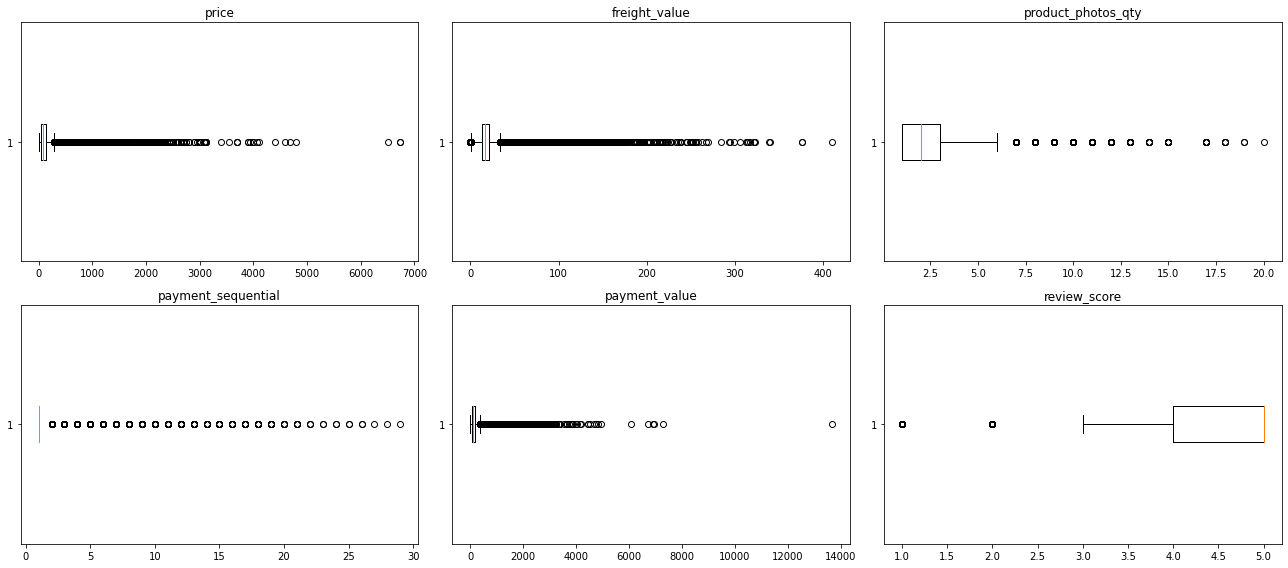

In [ ]:
# List of numeric columns
num_col = ['price', 'freight_value', 'product_photos_qty', 'payment_sequential', 'payment_value', 'review_score']

# Create subplots with 3x2 grids and size 18x8
fig, ax = plt.subplots(2, 3, figsize=(18,8))

cnt = 0

# Loop through the grids
for i in range(2):

    if cnt >= 7:
            break

    for j in range(3):

        if cnt >= 7:
            break
        
        # We use boxplot from pyplot
        ax[i, j].boxplot(df_olist_filtered[num_col[cnt]], vert=False)
        ax[i, j].set_title(str(num_col[cnt]), fontdict={'fontsize':12})

        # Increment counter
        cnt = cnt+1

# Make sure layout is not overlapping
fig.tight_layout()
# Show the graphs
fig.show()

In [ ]:
#Import method copy
import copy

# Copy original dataset
df_olist_capped = copy.deepcopy(df_olist_filtered)

In [ ]:
# Function to filter outlier
def capping_outlier(col):
    
    # Define upper limit and lower limit
    lwr_limit = df_olist_capped[col].quantile(0.03)
    upr_limit = df_olist_capped[col].quantile(0.97)

    print(str(col).upper())
    print("lwr:", lwr_limit, "upr:", upr_limit)
    print()
    
    # Filter outlier
    df_olist_capped[col] = np.where(df_olist_capped[col]> upr_limit, upr_limit, 
                                    np.where(df_olist_capped[col]< lwr_limit, lwr_limit, df_olist_capped[col]))

In [ ]:
# List of column with outlier
outlier_col = ['price', 'freight_value', 'payment_value', 'product_photos_qty']

# Loop to apply the function for filtering outlier
for col in outlier_col:
    capping_outlier(col)

PRICE
lwr: 14.9 upr: 518.4014000000033

FREIGHT_VALUE
lwr: 7.47 upr: 57.89810000000012

PAYMENT_VALUE
lwr: 20.0 upr: 616.54

PRODUCT_PHOTOS_QTY
lwr: 1.0 upr: 6.0



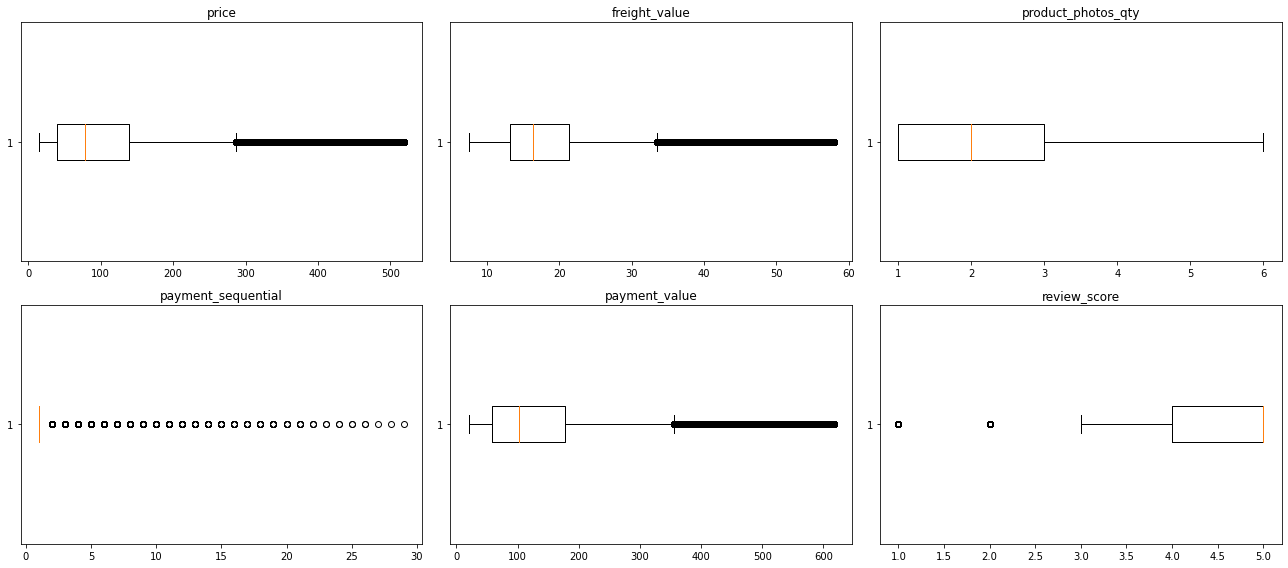

In [ ]:
# List of numeric columns
num_col = ['price', 'freight_value', 'product_photos_qty', 'payment_sequential', 'payment_value', 'review_score']

# Create subplots with 3x2 grids and size 18x8
fig, ax = plt.subplots(2, 3, figsize=(18,8))

cnt = 0

# Loop through the grids
for i in range(2):

    if cnt >= 7:
            break

    for j in range(3):

        if cnt >= 7:
            break
        
        # We use boxplot from pyplot
        ax[i, j].boxplot(df_olist_capped[num_col[cnt]], vert=False)
        ax[i, j].set_title(str(num_col[cnt]), fontdict={'fontsize':12})

        # Increment counter
        cnt = cnt+1

# Make sure layout is not overlapping
fig.tight_layout()
# Show the graphs
fig.show()

In [ ]:
# Copy dataset after preprocessing and cleaning
df_olist_clean = copy.deepcopy(df_olist_capped)
df_olist_clean.head()

,order_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,product_id,seller_id,price,freight_value,product_photos_qty,payment_sequential,payment_type,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english,year,month,date
0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-06-05 00:00:00,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.8800,1.0,1,credit_card,146.87,4,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,office_furniture,2017,5,16
1,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-06-13 00:00:00,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.7900,1.0,1,credit_card,157.73,5,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,office_furniture,2018,5,19
2,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-04-10 00:00:00,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,23.3600,1.0,1,credit_card,173.30,5,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,office_furniture,2018,3,13
3,997fd4b37386d10b57d4ac8cdec011a6,delivered,2018-07-08 09:59:19,2018-08-16 00:00:00,8ed094bfe076c568f6bb10feada3f75d,7c67e1448b00f6e969d365cea6b010ab,199.98,57.8981,1.0,1,credit_card,315.75,1,07d190f123147d9e89d4b922543d7948,65075,sao luis,MA,office_furniture,2018,7,8
4,b63fff1ef8b6201df68bb611ee41129e,delivered,2017-04-02 22:15:27,2017-05-08 00:00:00,aba86c093ccdbac75b09111d57e50004,7c67e1448b00f6e969d365cea6b010ab,129.60,16.6100,1.0,1,boleto,146.21,4,332cf4e83e16004ba7dca932ce82475b,90010,porto alegre,RS,office_furniture,2017,4,2


In [ ]:
df_olist_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105692 entries, 0 to 116575
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       105692 non-null  object        
 1   order_status                   105692 non-null  object        
 2   order_purchase_timestamp       105692 non-null  datetime64[ns]
 3   order_estimated_delivery_date  105692 non-null  object        
 4   product_id                     105692 non-null  object        
 5   seller_id                      105692 non-null  object        
 6   price                          105692 non-null  float64       
 7   freight_value                  105692 non-null  float64       
 8   product_photos_qty             105692 non-null  float64       
 9   payment_sequential             105692 non-null  int64         
 10  payment_type                   105692 non-null  object        
 11  

# Analysis
1. Number of orders from month to month
2. Top products category
3. Distribution of payment value from each payment method
4. Distribution of review score


## 1. Number of orders from month to month


In [ ]:
# Add new column for month-year
df_olist_clean['month_year'] = df_olist_clean['order_purchase_timestamp'].dt.strftime('%Y-%m')
df_olist_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105692 entries, 0 to 116575
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       105692 non-null  object        
 1   order_status                   105692 non-null  object        
 2   order_purchase_timestamp       105692 non-null  datetime64[ns]
 3   order_estimated_delivery_date  105692 non-null  object        
 4   product_id                     105692 non-null  object        
 5   seller_id                      105692 non-null  object        
 6   price                          105692 non-null  float64       
 7   freight_value                  105692 non-null  float64       
 8   product_photos_qty             105692 non-null  float64       
 9   payment_sequential             105692 non-null  int64         
 10  payment_type                   105692 non-null  object        
 11  

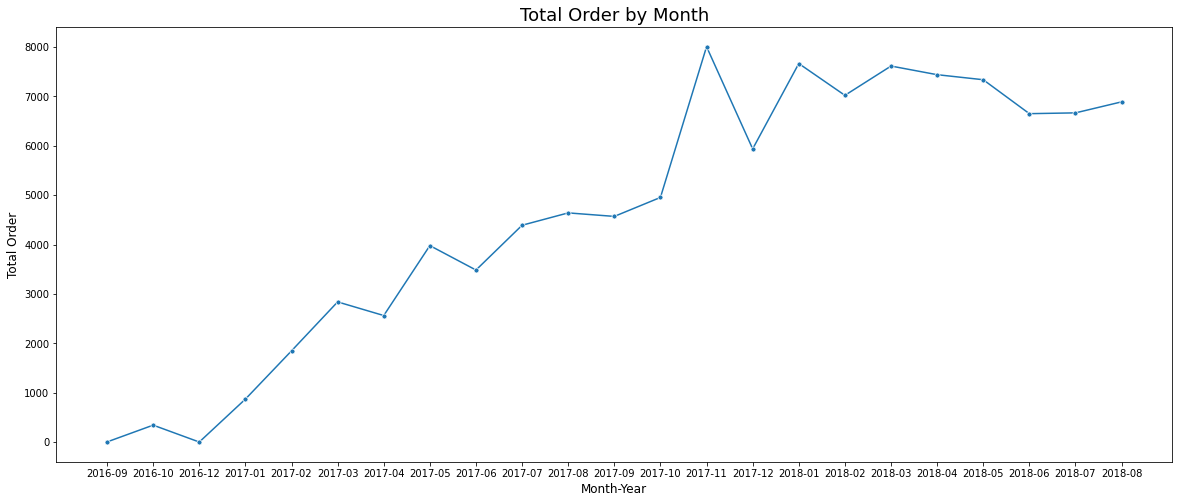

In [ ]:
# Group by order
order_per_month = df_olist_clean.groupby(['month_year']).count()[['order_id']]

# Exclude last month because only 1 records found
order_per_month = order_per_month.iloc[:-1]

# Visualization
fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.lineplot(data=order_per_month, marker='o', markersize=5, color='green', label='Total Order')
ax.set_title('Total Order by Month', fontsize=18)
ax.set_xlabel('Month-Year', fontsize=12)
ax.set_ylabel('Total Order', fontsize=12)
ax.get_legend().remove()
fig.show()

Observations :

*   The highest number of orders were in November 2017. That can happen because there is a Black Friday that offers promos in November so that customers shop for Christmas gifts.
*   The trends of total orders tends to increase from 2016 to 2017. However, total orders more stable as it enters 2018.




## 2. Top products category

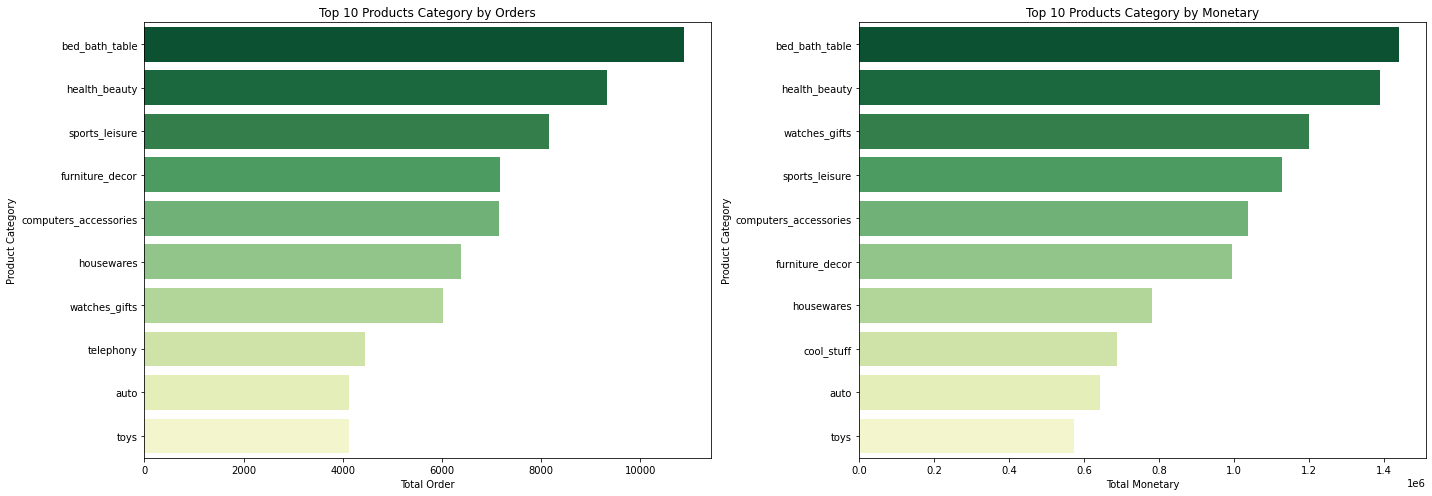

In [ ]:
# Group by top 10 products category by Total Order and Total Monetary
products_by_order = df_olist_clean.groupby('product_category_name_english').count()[['order_id']].sort_values(by='order_id', ascending=False).reset_index()[:10]
product_by_payment_value = df_olist_clean.groupby('product_category_name_english').sum()[['payment_value']].sort_values(by='payment_value', ascending=False).reset_index()[:10]

# Create subplots with 2x1 grids and size 20x7
fig, ax = plt.subplots(1, 2, figsize=(20,7))

# Plot barplot [0]
sns.barplot(data=products_by_order, x='order_id', y='product_category_name_english', palette='YlGn_r', ax=ax[0])
ax[0].set_title("Top 10 Products Category by Orders", fontdict={'fontsize':12})
ax[0].set_xlabel("Total Order", fontdict={'fontsize':10})
ax[0].set_ylabel("Product Category", fontdict={'fontsize':10})

# Plot barplot [1]
sns.barplot(data=product_by_payment_value, x='payment_value', y='product_category_name_english', palette='YlGn_r', ax=ax[1])
ax[1].set_title("Top 10 Products Category by Monetary", fontdict={'fontsize':12})
ax[1].set_xlabel("Total Monetary", fontdict={'fontsize':10})
ax[1].set_ylabel("Product Category", fontdict={'fontsize':10})

# Make sure layout is not overlapping
fig.tight_layout()

# Show the graphs
fig.show()

Observations :

- The most purchased products category is 'Bed Bath Table' with total purchases 11,900 times.
- Those 10 products category can be the attention of marketing team to increase sales.


## 3. Distribution of payment value from each payment method

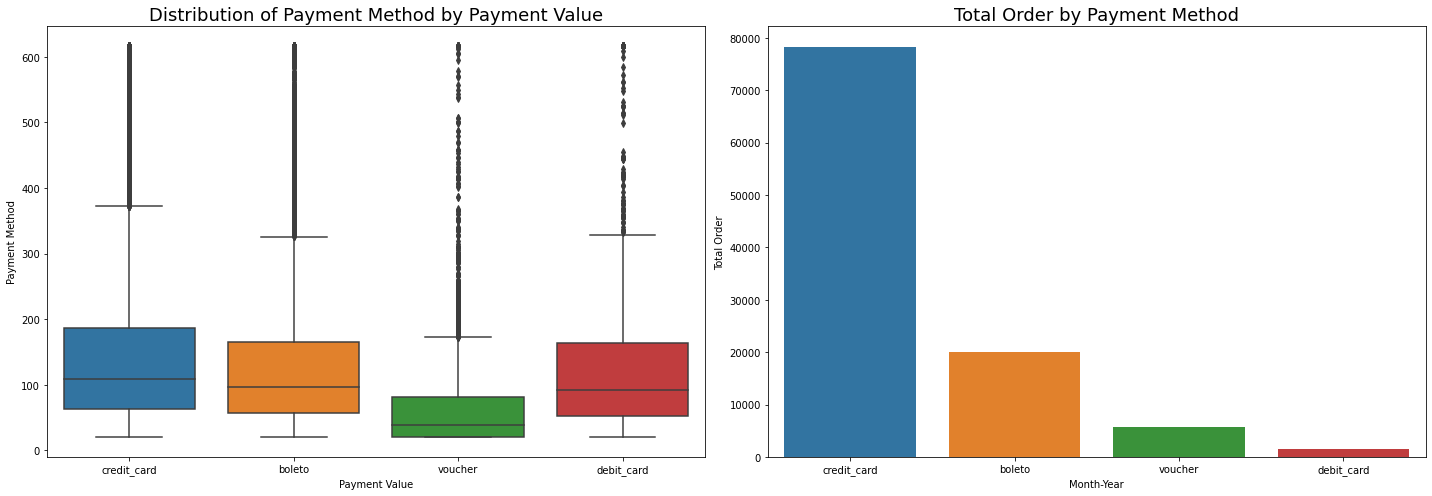

In [ ]:
# Create subplots with 1x2 grids and size 20x7
fig, ax = plt.subplots(1, 2, figsize=(20,7))

# Plot boxplot [0]
sns.boxplot(data=df_olist_clean, y="payment_value", x="payment_type", ax=ax[0])
ax[0].set_title('Distribution of Payment Method by Payment Value', fontsize=18)
ax[0].set_xlabel('Payment Value',  fontdict={'fontsize':10})
ax[0].set_ylabel('Payment Method', fontdict={'fontsize':10})

# Plot countplot [0]
sns.countplot(data=df_olist_clean, x="payment_type", ax=ax[1])
ax[1].set_title('Total Order by Payment Method', fontsize=18)
ax[1].set_xlabel('Month-Year',  fontdict={'fontsize':10})
ax[1].set_ylabel('Total Order',  fontdict={'fontsize':10})

# Make sure layout is not overlapping
fig.tight_layout()

# Show the graphs
fig.show()

Observation:
- Seen a wide variety of payment value, up to R$600
- The payment method that is most often used by customers and has the highest median payment value is the credit card.
- The payment method as the second option used by the customer is boleto. Boleto is a unique payment method in Brazil.
- The payment method that has the lowest median is the voucher. This could be possible because the discount given makes the payment price lower.

## 4. Distribution of review score

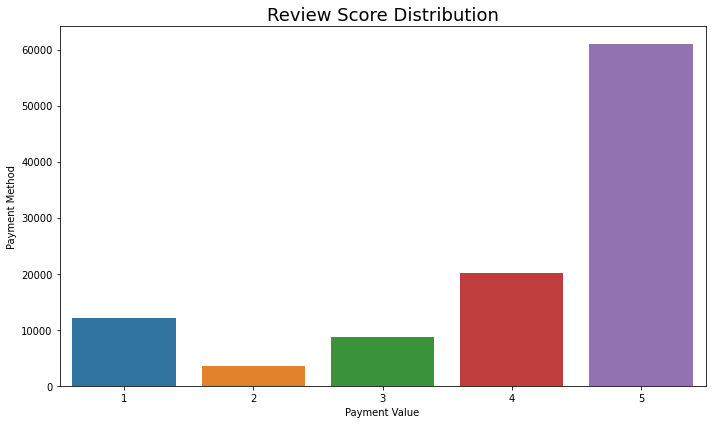

In [ ]:
# Create subplots size 10,6
fig, ax = plt.subplots(figsize=(10,6))

# Plot countplot
sns.countplot(data=df_olist_clean, x="review_score", ax=ax)
ax.set_title('Review Score Distribution', fontsize=18)
ax.set_xlabel('Payment Value',  fontdict={'fontsize':10})
ax.set_ylabel('Payment Method', fontdict={'fontsize':10})

# Make sure layout is not overlapping
fig.tight_layout()

# Show the graphs
fig.show()

In [ ]:
score = [1, 2, 3, 4, 5]

for i in score:
  total = df_olist_clean[df_olist_clean['review_score']==i]['order_id'].count()
  percent = round(df_olist_clean[df_olist_clean['review_score']==i]['order_id'].count()/len(df_olist_clean)*100, 2)
  print(f'Review score {i}: {total} orders / {percent} %')

Review score 1: 12186 orders / 11.53 %
Review score 2: 3510 orders / 3.32 %
Review score 3: 8772 orders / 8.3 %
Review score 4: 20138 orders / 19.05 %
Review score 5: 61086 orders / 57.8 %


Observation:
- The most frequently given review score is 5, namely 61,086 orders (57.8%)
- The least review score given is 2, which is 3,510 orders (3

# Conclusion
1. Based on the trend, sales tend to increase from 2016 to 2017. In early 2018, sales tended to be stable. The marketing strategy in October - November 2017 can be used as a reference for conducting campaigns and promotions because, at that time, sales increased dramatically.

2. Based on product categories, the "Bed Bath Table" and "Health Beauty" categories took the top positions in terms of sales and monetary. These two categories could be used as options for upselling or cross-selling strategies.

3. Based on the payment method, "credit card" is the most preferred choice by customers and has the highest median payment value. Maybe a promo or cooperation with a "credit card" can be given to get other benefits if you make payments with a "credit card" so that customers are more interested in making payments using a "credit card".

4. Based on the review score given by the customer, 57.8% of the customers provides a score of 5. This is good enough, but it is necessary to find out why customers give reviews below 5 with further analysis.